In [72]:
# Exercício 1.1
# Para encontrarmos o valor de ln(3) usando o método da bisseção,
# queremos uma função tal que f(ln(3)) = 0.
# Como sabemos as propriedades de ln, temos que:
# e^ln3 = 3
# e^ln3 − 3 = 0
# f(x)= e^𝑥 − 3


In [1]:
# Função cuja raiz é ln(3)
function F(x)
    return exp(x) - 3
end

F (generic function with 1 method)

In [36]:
# Metodo de Bisseção com intervalo menor que 10^−3
# Vamos adptar uma função já feita de outra lista para utilizar o metodo da bissecao na função F
# O algoritmo calcula, pelo metodo da bisseção, a solução para F no intervalo [ 1.0985,1.0987].
# O parâmetro é o erro máximo
function bi(erro)
    menor = 1.0985
    maior = 1.0987 # Intevalo menor que 10^-3
    x=0.0
    k=0
    while(abs(F(x))>erro)
        x=(maior+menor)/2
        if(F(x)<0)
            menor=x
        else
            maior=x
        end
        k+=1
    end
    return x
end

bi (generic function with 1 method)

In [37]:
bi(10^-5)

1.0986125000000002

In [5]:
#Precisamos da derivada de F(x) para o metodo de Newton
function dF(x)
    return exp(x)
end

dF (generic function with 1 method)

In [38]:
# O Metodo de Newton com 20 passos.
# Vamos adptar uma função já feita de outra lista para utilizar  o metodo da Newton na função F
# Recebe como parametro o "chute" inicial, o erro maximo e o numero maximo de iterações
# Retorna uma raiz de F, caso não encontre a raiz a função retorna nada e faz um print que não achou o zero.
function newton(chute, erro, casos)
    aux = 0
    while(abs(F(chute)) > erro && aux < casos)
         #Precisa checar se a dervida é zero ou proxima de zero ja que será usada para dividir F(x)
        if(abs(dF(chute)) < erro)
            print("Derivada nula\n")
            break
        end
        chute = chute - F(chute)/dF(chute)
        aux = aux+1
    end
    if(aux == casos )
        print("Não achou o zero\n")
        return
    end
    return chute
end

newton (generic function with 1 method)

In [39]:
newton(1,10^-5,20)

1.0986122887476075

In [8]:
# A interpolacao polinomial de grau 1 e estime o erro maximo.
# Vamos adptar uma função já feita de outra lista para utilizar o metodo de Interpolação
function interpolação(x,y)
    #criar a matriz V
    V=[x.^0 x.^1]
    #c=inv(V)*y #LENTO!!!!!!!!!!!!!!!!!!!!
    c=V\y #resolver o sistema linear Vc=y
    return c #vetor de coeficientes
end

interpolação (generic function with 1 method)

In [9]:
# Para montar um polinomio de grau 1, precisamos de 2 pontos
# Sabendo calcular e^x para qualquer x e  todas as propriedades de ln, temos:
X = [1,2.718281828]
Y = [0,1]
interpolação(X,Y)

2-element Vector{Float64}:
 -0.5819767070248036
  0.5819767070248036

In [10]:
P(x)=-0.5819767070248036+0.5819767070248036*x

P (generic function with 1 method)

In [11]:
#ln(3) aproximado
P(3)

1.1639534140496073

In [12]:
ErroM=((3 - 1)*(3-2.718281828))/2

0.28171817200000016

In [13]:
#Exercício 1.2. Usando o material da Aula15
#1 - Gere aleatoriamente 30 pontos de um polinomio de grau 5.
using Plots
using Random
using LinearAlgebra

In [14]:
n = 30
x = range(0,1,length=n)
y = -5*x.^5 +4*x.^4 -3*x.^3 +2*x.^2 - 1*x.^1 .+1  + randn(n)*0.3 #ruido

30-element Vector{Float64}:
  1.3949006067370162
  1.347334098556551
  0.5327072039776934
  0.4448115298356303
  0.8057798331983874
  1.1472153838685588
  0.2467161089625849
 -0.09307583062156921
  0.9547320293950488
  0.7641418709622617
  0.37566326375386444
  1.1823403056969106
  0.5134133411491145
  ⋮
  0.5109264626581352
  0.7814211672546756
  0.6532577530997478
 -0.18574922626172663
  0.07715592522548705
 -0.4327042562817109
 -0.3573938822774911
 -0.05836530412667851
 -0.8079121036230752
 -1.503568172594806
 -1.9492953798069952
 -1.8181083719008844

In [15]:
# 2 - Faca regressão polinomial com polinomios de grau 0 ate 29.
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [16]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

In [17]:
function polinomio(grau)
    V = vandermonde(x,y,grau)
    a = V\y
    f(x) =sum(a[i+1]*x^i for i in 0:grau)
    return f
end

polinomio (generic function with 1 method)

In [18]:
polinomios = [polinomio(i) for i in 0:29]

30-element Vector{var"#f#2"{Int64, Vector{Float64}}}:
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 (::var"#f#2"{Int64, Vector{Float64}}) (generic function with 1 method)
 ⋮
 (::var

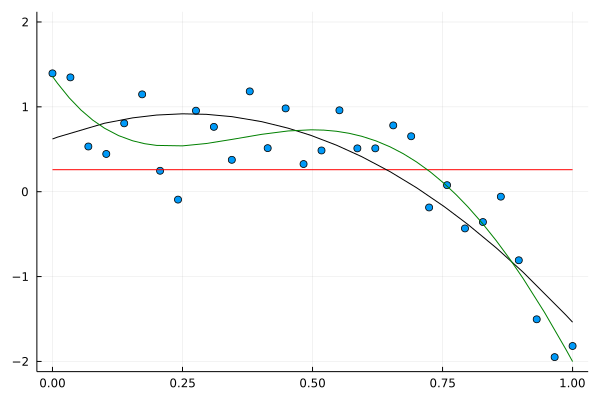

In [19]:
scatter(x,y,leg=false)
plot!(polinomios[1], c=:red)
plot!(polinomios[3], c=:black)
plot!(polinomios[5], c=:green,   
    xaxis=([0,1]),
    yaxis=([-2,2]))

In [21]:
# 3 - É possıvel fazer a regressao com um polinomio de grau maior que 29? O  ́que acontece com o Julia?
grau_30(x) = polinomio(30)(x)
grau_40(x) = polinomio(40)(x)
grau_50(x) = polinomio(50)(x)
grau_100(x) = polinomio(100)(x)

grau_100 (generic function with 1 method)

In [25]:
function erro_total(x,y,modelo)
    n,=size(y)
    S=0
    for i=1:n
        S=S+(y[i]-modelo(x[i]))^2
    end
    return sqrt(S)  
end

erro_total (generic function with 1 method)

In [130]:
erro_total(x,y,grau_30)

0.6809415680102896

In [131]:
erro_total(x,y,grau_40)

0.6331350672438102

In [133]:
erro_total(x,y,grau_50)

0.6217924269018729

In [134]:
erro_total(x,y,grau_100)

0.5526024380765486

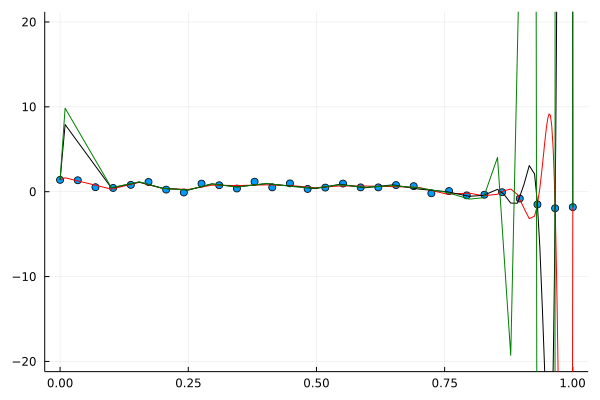

In [23]:
scatter(x,y,leg=false)
plot!(grau_30, c=:red)
plot!(grau_40, c=:black)
plot!(grau_50, c=:green,   
    xaxis=([0,1]),
    yaxis=([-20,20]))

In [138]:
#Sim é possivel. O julia gerou  polinomios com erros bastante baixos nos pontos. 
#Contudo, as curvas entre os pontos  vão se acentuando. 

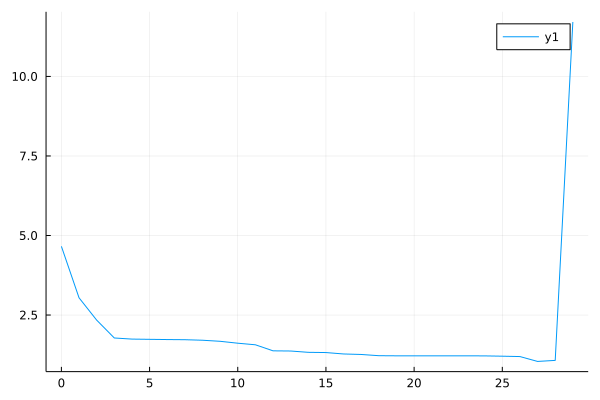

In [40]:
# 4 - Faca o plot do Erro total (eixo y) por grau (eixo x). O que se pode dizer
# desse grafico conforme o grau aumenta? Era o que voce esperava? Por que?
y_erros  =[erro_total(x,y,polinomios[i]) for i in 1:30]
x_erros  =[i for i in 0:29]
plot(x_erros,y_erros)

In [28]:
#Como esperado, a medida que aumentamos o grau diminuimos o erro total. Contudo, inesperadamente, no polinomio de grau 29, que 
#em teoria deveria ter erro 0, apresentou um erro maior do que o anterior.

In [41]:
#Exercício 1.3
#Como na aula 14, vamos criar as matrizes para determinar qual o filme mais votado. A ordem dos filmes na matriz A é:
# Toy Story, Rocky, De Volta pro Futuro, Curtindo a vida, Incriveis, Duna, Batman, Harry Potter, Sherek
# Atribuimos o valor 10 para o filme Rocky
A=[1 -1 0 0 0 0 0 0 0; 0 0 1 -1 0 0 0 0 0; 0 0 0 0 1 -1 0 0 0; 0 0 0 0 0 0 1 -1 0; 0 0 0 0 0 -1 0 0 1; 0 -1 0 0 0 0 0 1 0; 1 0 -1 0 0 0 0 0 0; 0 0 0 0 1 0 0 -1 0; 0 0 0 1 0 -1 0 0 0; 0 0 1 0 0 -1 0 0 0; 0 -1 0 0 0 0 0 0 1; 0 0 0 0 1 0 -1 0 0;  1 0 0 0 0 0 -1 0 0; 0 0 0 -1 1 0 0 0 0; 0 1 0 0 0 0 0 0 0]

15×9 Matrix{Int64}:
 1  -1   0   0  0   0   0   0  0
 0   0   1  -1  0   0   0   0  0
 0   0   0   0  1  -1   0   0  0
 0   0   0   0  0   0   1  -1  0
 0   0   0   0  0  -1   0   0  1
 0  -1   0   0  0   0   0   1  0
 1   0  -1   0  0   0   0   0  0
 0   0   0   0  1   0   0  -1  0
 0   0   0   1  0  -1   0   0  0
 0   0   1   0  0  -1   0   0  0
 0  -1   0   0  0   0   0   0  1
 0   0   0   0  1   0  -1   0  0
 1   0   0   0  0   0  -1   0  0
 0   0   0  -1  1   0   0   0  0
 0   1   0   0  0   0   0   0  0

In [42]:
B = [11;3;7;2;9;7;5;5;2;2;11;5;3;7;10]

15-element Vector{Int64}:
 11
  3
  7
  2
  9
  7
  5
  5
  2
  2
 11
  5
  3
  7
 10

In [43]:
# Toy Story, Rocky, De Volta pro Futuro, Curtindo a vida, Incriveis, Duna, Batman, Harry Potter, Sherek
x = A\B

9-element Vector{Float64}:
 20.941949616648415
 10.000000000000002
 16.256297918948523
 14.3789704271632
 21.432639649507124
 13.447973713033956
 17.56955093099672
 16.334063526834612
 21.72398685651698

In [56]:
#Dessa forma o filme mais popular é Sherek, seguido de Incriveis e Toy Story

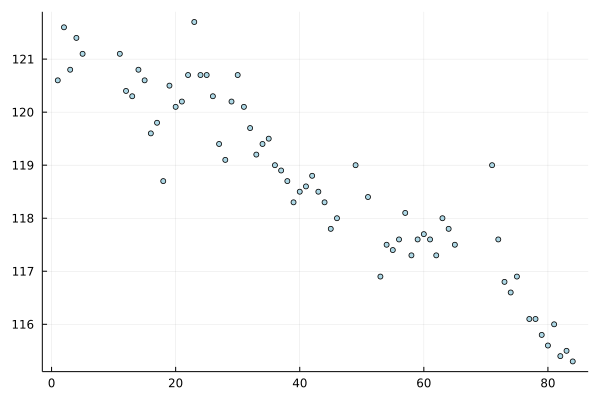

In [44]:
#Exercicio 1.4
#Considerando 26/10 como o primeiro dia da pesagem
A=[120.6;121.6;120.8;121.4;121.1;121.1;120.4;120.3;120.8;120.6;119.6;119.8;118.7;120.5;120.1;120.2;120.7;121.7;120.7;120.7;120.3;119.4;119.1
;120.2;120.7;120.1;119.7;119.2;119.4;119.5;119;118.9;118.7;118.3;118.5
;118.6;118.8;118.5;118.3;117.8;118;119;118.4;116.9;117.5;117.4;117.6;118.1;117.3;117.6;117.7;117.6;117.3;118;117.8;117.5;119;117.6;116.8;116.6;
116.9;116.1;116.1;115.8;115.6;116;115.4;115.5;115.3]
B=[1;2;3;4;5;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31;32;33;34;35;36;37;38;39;40;41;42;43;44;45;46;49;51;53;54;55;56;57;58;59;60;61;62;63;64;65;71;72;73;74;75;77;78;79;80;81;82;83;84]
scatter(B, A, c=:lightblue, ms=3, leg=false)

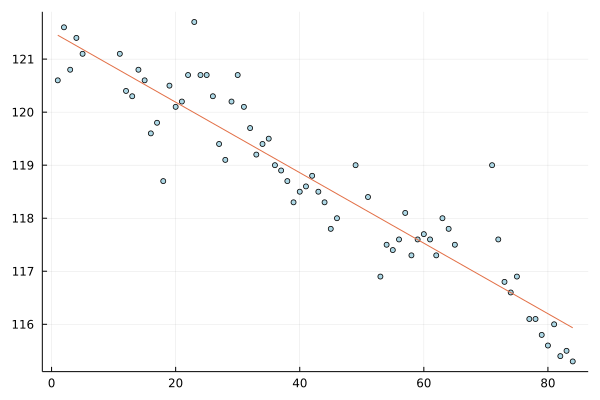

In [33]:
#Analisando o gráfico dos pontos, uma boa maneira de fazer a regressão seria utilizando uma reta passando pelos pontos
V=vandermonde(B,A,1)
C=regressão(B,A,1)
Reta(x)= C[1]+C[2]*x 
scatter(B, A, c=:lightblue, ms=3, leg=false)
plot!(Reta)

In [45]:
# O dia em que ele vai pesar 110 kg
(110 - C[1])/C[2]

173.26753579630514